## P1 (35pt):  Write a Python code using NumPy, Matplotlib, and Keras to perform image classification for the Fashion_MINIST datset (https://github.com/zalandoresearch/fashion-mnist)

1. (5pt) Load the dataset using tf.keras.datasets.fashion_mnist.load_data() and show the first 12 images of the training dataset in two rows. 

4423680/4422102 [==============================] - 0s 0us/step


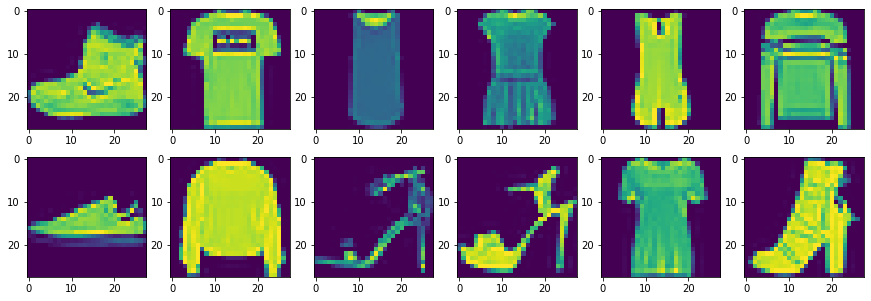

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

fig, axes = plt.subplots(nrows=2, ncols=6,figsize=(15,5))
ax = axes.ravel()
for i in range(12):
  ax[i].imshow(training_images[i].reshape(28,28))
  
plt.show()

2. (5pt) Add the “depth” dimension to the training/testing image data using .reshape(), use to_categorical() to transform all labels into their one-hot encoding forms, and normalize the pixel values of all images into [0, 1]. Print out the shapes of training and testing images. 

*   Note that the imported training/testing image data have a shape of (number_samples, image_height, image_width) and you want to reshape it into the shape of (number_samples, image_height, image_width, image_depth/image_channels)




In [ ]:
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

training_labels = to_categorical(training_labels)
test_labels = to_categorical(test_labels)

training_images=training_images / 255.0
test_images=test_images / 255.0

training_images.shape
test_images.shape

(10000, 28, 28, 1)

3. (10pt) Build a CNN model using a stack of Conv2D (128 filters of size (3, 3) with ReLU activation), MaxPooling2D (pool size of (2, 2)), Conv2D (64 filters of size (3, 3 with ReLU activation), MaxPooling2D (pool size of (2, 2)), Dense (128 hidden units with ReLU activation), and output layer. Display the model architecture using .summary(). 

* You need to specify other parameters of the input layer and output layer.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

4. (10pt) Compile and train the model for 10 epochs and batch size of 32. Set verbose = 0 during the training to compress the training progress. Draw the plot of the training accuracy w.r.t. the epoch number

* You need to specify the right optimizer, loss function, and metrics for this task. 


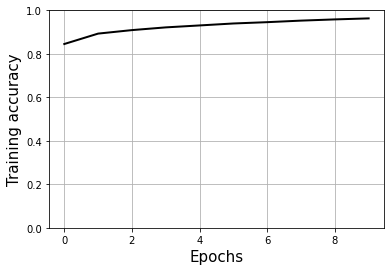

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
#If unspecified, batch_size will default to 32.
history=model.fit(training_images, training_labels, epochs=10, batch_size=32, verbose = 0)

plt.plot(history.history['acc'],c='k',lw=2)
plt.grid(True)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.ylim(0,1.0)
plt.show()

5. (5pt) Test your trained model on the testing dataset and observe the loss and accuracy using .evaluate().

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\nTest accuracy: ",test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.3139 - acc: 0.9140

Test accuracy:  0.9139999747276306


## P2 (65pt): Write a Python code using NumPy, Matploblib and Keras to perform image classification using pre-trained model for the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html).

1. (5pt) Load the dataset using tf.keras.datasets.cifar10.load_data() and show the first 20 images of the training dataset in two rows. 

* You will obtain the pair of feature matrix and label vector for the training dataset and the pair of  feature matrix and label vector for the testing dataset at the end of this step

* Note that the CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, each with a label value within [0, 9]. In the following step, we want to partition this dataset into two training/testing pairs, one containing images with labels in [0, 4] and the other containing images with labels in [5, 9]. 

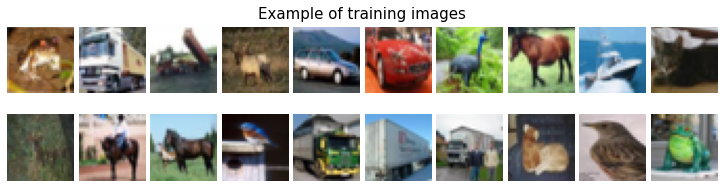

In [ ]:
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import random

(x_cifar_train, y_cifar_train), (x_cifar_test, y_cifar_test) = cifar10.load_data()

fig, ax = plt.subplots(2,10,figsize=(10,2.8))
fig.suptitle("Example of training images", fontsize=15)
axes = ax.ravel()
for i in range(20):
    axes[i].imshow(x_cifar_train[i])
    axes[i].axis('off')
fig.tight_layout(pad=0.5)
plt.show()

In [ ]:
(y_cifar_train < 5).reshape(50000, )

array([False, False, False, ..., False,  True,  True])

In [ ]:
x_cifar_train.shape

(50000, 32, 32, 3)

2.	(5 pt) Reshape the label vectors in both the training and testing datasets to 1D using .reshape(), and compare them with 5 to find out the indices of images that have class labels < 5 and class labels >= 5, respectively, in the training and testing datasets. 

* You will obtain four index arrays of Boolean values at the end of this step (<5 and >= 5 for training dataset and <5 and >=5 for testing dataset)

* Hint: label_vector < 5 and label_vector >= 5 will generate such indices

In [ ]:
y_cifar_train = y_cifar_train.reshape(50000,)
y_cifar_test = y_cifar_test.reshape(10000,)

index_train_lt5 = (y_cifar_train < 5)
index_train_gte5 = (y_cifar_train >= 5)

index_test_lt5 = (y_cifar_test < 5)
index_test_gte5 = (y_cifar_test >= 5)

3. (5 pt) Use the index arrays obtained in the previous step to split the training/testing dataset into two subsets (each consisting of a feature matrix and a label vector): one with class labels < 5 and one with class labels >= 5. Print out the shapes of the resulting subsets for both training and testing datasets.

* You will obtain four subsets at the end of this step: one pair of training and testing subsets of images with class labels < 5 and another pair of training and testing subsets of images with class labels >= 5. 

In [ ]:
x_train_lt5 = x_cifar_train[index_train_lt5]
y_train_lt5 = y_cifar_train[index_train_lt5]
x_test_lt5 = x_cifar_test[index_test_lt5]
y_test_lt5 = y_cifar_test[index_test_lt5]

x_train_gte5 = x_cifar_train[index_train_gte5]
y_train_gte5 = y_cifar_train[index_train_gte5]
x_test_gte5 = x_cifar_test[index_test_gte5]
y_test_gte5 = y_cifar_test[index_test_gte5]

In [ ]:
x_train_lt5.shape

(25000, 32, 32, 3)

4. (5pt) Subtract 5 from the label vectors of the pair of training and testing subsets with class labels >= 5 so that the label vectors in this pair of subsets contains values from 0 to 4. Use to_categorical() to transform all labels into their one-hot encoding forms, and normalize the pixel values of all images into [0, 1]. 

In [ ]:
y_train_gte5 = y_train_gte5 - 5
y_test_gte5 = y_test_gte5 - 5

y_train_lt5 = to_categorical(y_train_lt5)
y_test_lt5 = to_categorical(y_test_lt5)
y_train_gte5 = to_categorical(y_train_gte5)
y_test_gte5 = to_categorical(y_test_gte5)

x_train_lt5 = x_train_lt5 / 255.0
x_test_lt5 = x_test_lt5 / 255.0
x_train_gte5 = x_train_gte5 / 255.0
x_test_gte5 = x_test_gte5 / 255.0

5. (5pt) Build a CNN model_1 using a stack of Conv2D (64 filters of size (3, 3) with ReLU activation), Conv2D (64 filters of size (3, 3) with ReLU activation), MaxPooling2D (pool size of (2, 2)), Dense (128 hidden units with ReLU activation), and output layer. Display the model architecture using .summary(). 

* You need to specify the correct hyperparameters of the input layer and output layer.

In [ ]:
# number of convolutional filters to use
filters = 64
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size
kernel_size = 3

input_shape = (32,32,3)

feature_layers = [
    Conv2D(filters, kernel_size, input_shape=input_shape, activation = 'relu'),
    Conv2D(filters, kernel_size, activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
]

classification_layers = [
    Dense(128, activation = 'relu'),
    Dense(5, activation = 'softmax'),
]

model_1 = Sequential(feature_layers + classification_layers)

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 1,645,125
Trainable params: 1,645,125
Non-trainable params: 0
____________________________________________

6. (10pt) Compile and train the model on the subset of training images with class labels < 5 for 20 epochs and batch size of 128. Set verbose = 0 during the training to compress the results. Draw the plot of the training accuracy w.r.t. the epoch number. 

* You need to specify the correct optimizer, loss function, and metrics for this task.  

In [ ]:
x_train_lt5.shape

(25000, 32, 32, 3)

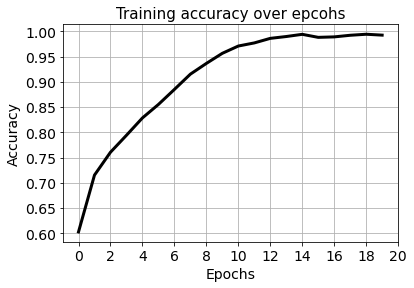

In [ ]:
batch_size = 128
epochs = 20

model_1.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])
model_1.fit(x_train_lt5, y_train_lt5, batch_size=batch_size, epochs=epochs, verbose=0)

plt.title("Training accuracy over epcohs",fontsize=15)
plt.plot(model_1.history.history['acc'],lw=3,c='k')
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Accuracy",fontsize=14)
plt.xticks([2*i for i in range(11)],fontsize=14)
plt.yticks(fontsize=14)
plt.show()

7.	(5pt) Test your trained model_1 on the subset of testing images with class labels <5  and observe the loss and accuracy using .evaluate().

In [ ]:
model_1.evaluate(x_test_lt5, y_test_lt5)

157/157 [==============================] - 1s 4ms/step - loss: 1.5256 - acc: 0.7588


[1.5255848169326782, 0.7588000297546387]

8. (10pt) Build a new CNN model_2 that has the same architecture as model_1
and reuse the pre-trained convolutional base layers of model_1 (i.e., all layers before applying flatten()). You need to freeze the pre-trained convolutional base layers of model_2 so that their model parameters will not be changed during the training. Display the model architecture of model_2 using .summary().

* One method to achieve the above step is as follows (You can use other methods as long as they achieve the same goal):

* Other methods can be found here: https://ravimashru.github.io/100-days-of-deep-learning/days/017.html

In [ ]:
# Alternative methods
# model_2 = models.Sequential()
# for layer in model_1.layers[0:4]: 
#     layer.trainable = False
#     model_2.add(layer)
# model_2.add(layers.Dense(128, activation='relu'))
# model_2.add(layers.Dense(5, activation='softmax'))
# model_2.summary()


#Clone a new model from an existing model
model_2 = keras.models.clone_model(model_1)

# Freeze all layers except the last two layers.
for layer in model_2.layers[:-2]:
  layer.trainable = False

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 1,645,125
Trainable params: 1,606,405
Non-trainable params: 38,720
_______________________________________

9. (10pt) Compile model_2, and train it on the subset of training images with class labels >=5 for 20 epochs and batch size of 128. Draw the plot of the training accuracy w.r.t. the epoch number. 

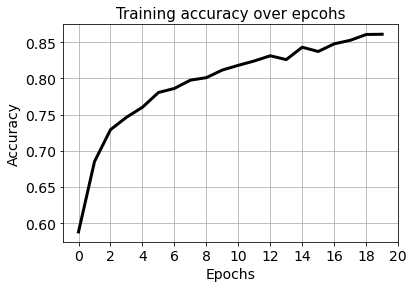

In [ ]:
model_2.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])
model_2.fit(x_train_gte5, y_train_gte5, batch_size=batch_size, epochs=epochs, verbose=0)

plt.title("Training accuracy over epcohs",fontsize=15)
plt.plot(model_2.history.history['acc'],lw=3,c='k')
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Accuracy",fontsize=14)
plt.xticks([2*i for i in range(11)],fontsize=14)
plt.yticks(fontsize=14)
plt.show()

10.	(5pt) Test your trained model_2 on the subset of testing images with class labels >=5  and observe the loss and accuracy using .evaluate().

In [ ]:
model_2.evaluate(x_test_gte5, y_test_gte5)

157/157 [==============================] - 1s 4ms/step - loss: 0.5195 - acc: 0.8100


[0.5194858908653259, 0.8100000023841858]